In [1]:
pip install numpy scipy pyAudioAnalysis eyed3 pydub umap-learn hdbscan noisereduce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 118.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264372 sha256=84bc4af37bfd682ff64a2d3f44235

In [2]:
# Import Libraries
import numpy as np
import scipy
from scipy.io import wavfile
import numpy as np
import scipy
import pyAudioAnalysis as pyA
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
import os
import noisereduce as nr

In [3]:
# Mount Drive to access files on google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


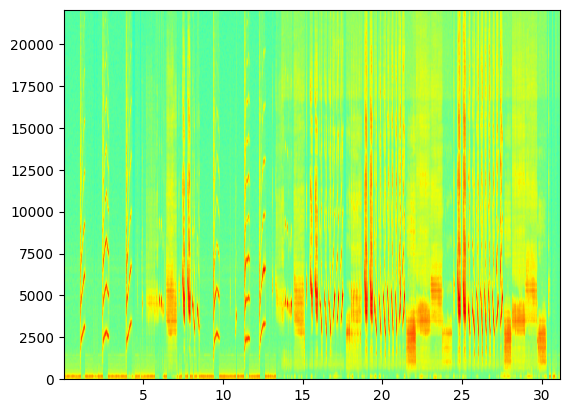

In [4]:
# Test that you can access relevant files -- and choose file for analysis
from scipy.io import wavfile
demoFile = '/content/drive/MyDrive/Rose_Bird/Demo_Wav_files/USA5207_45107.22309894_6_30_6_11_49.wav'
samplerate, data = wavfile.read(demoFile)

# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=samplerate,stationary = True)



FS = samplerate # input
NFFT = 512
noverlap = 450  # noverlap > NFFT/2

# Create Spectrogram
spectrumA, freqsA, tA, imA = plt.specgram(data, NFFT=NFFT, Fs=FS, noverlap=noverlap,cmap='jet')

spectrum, freqs, t, im = plt.specgram(reduced_noise, NFFT=NFFT, Fs=FS, noverlap=noverlap,cmap='jet')


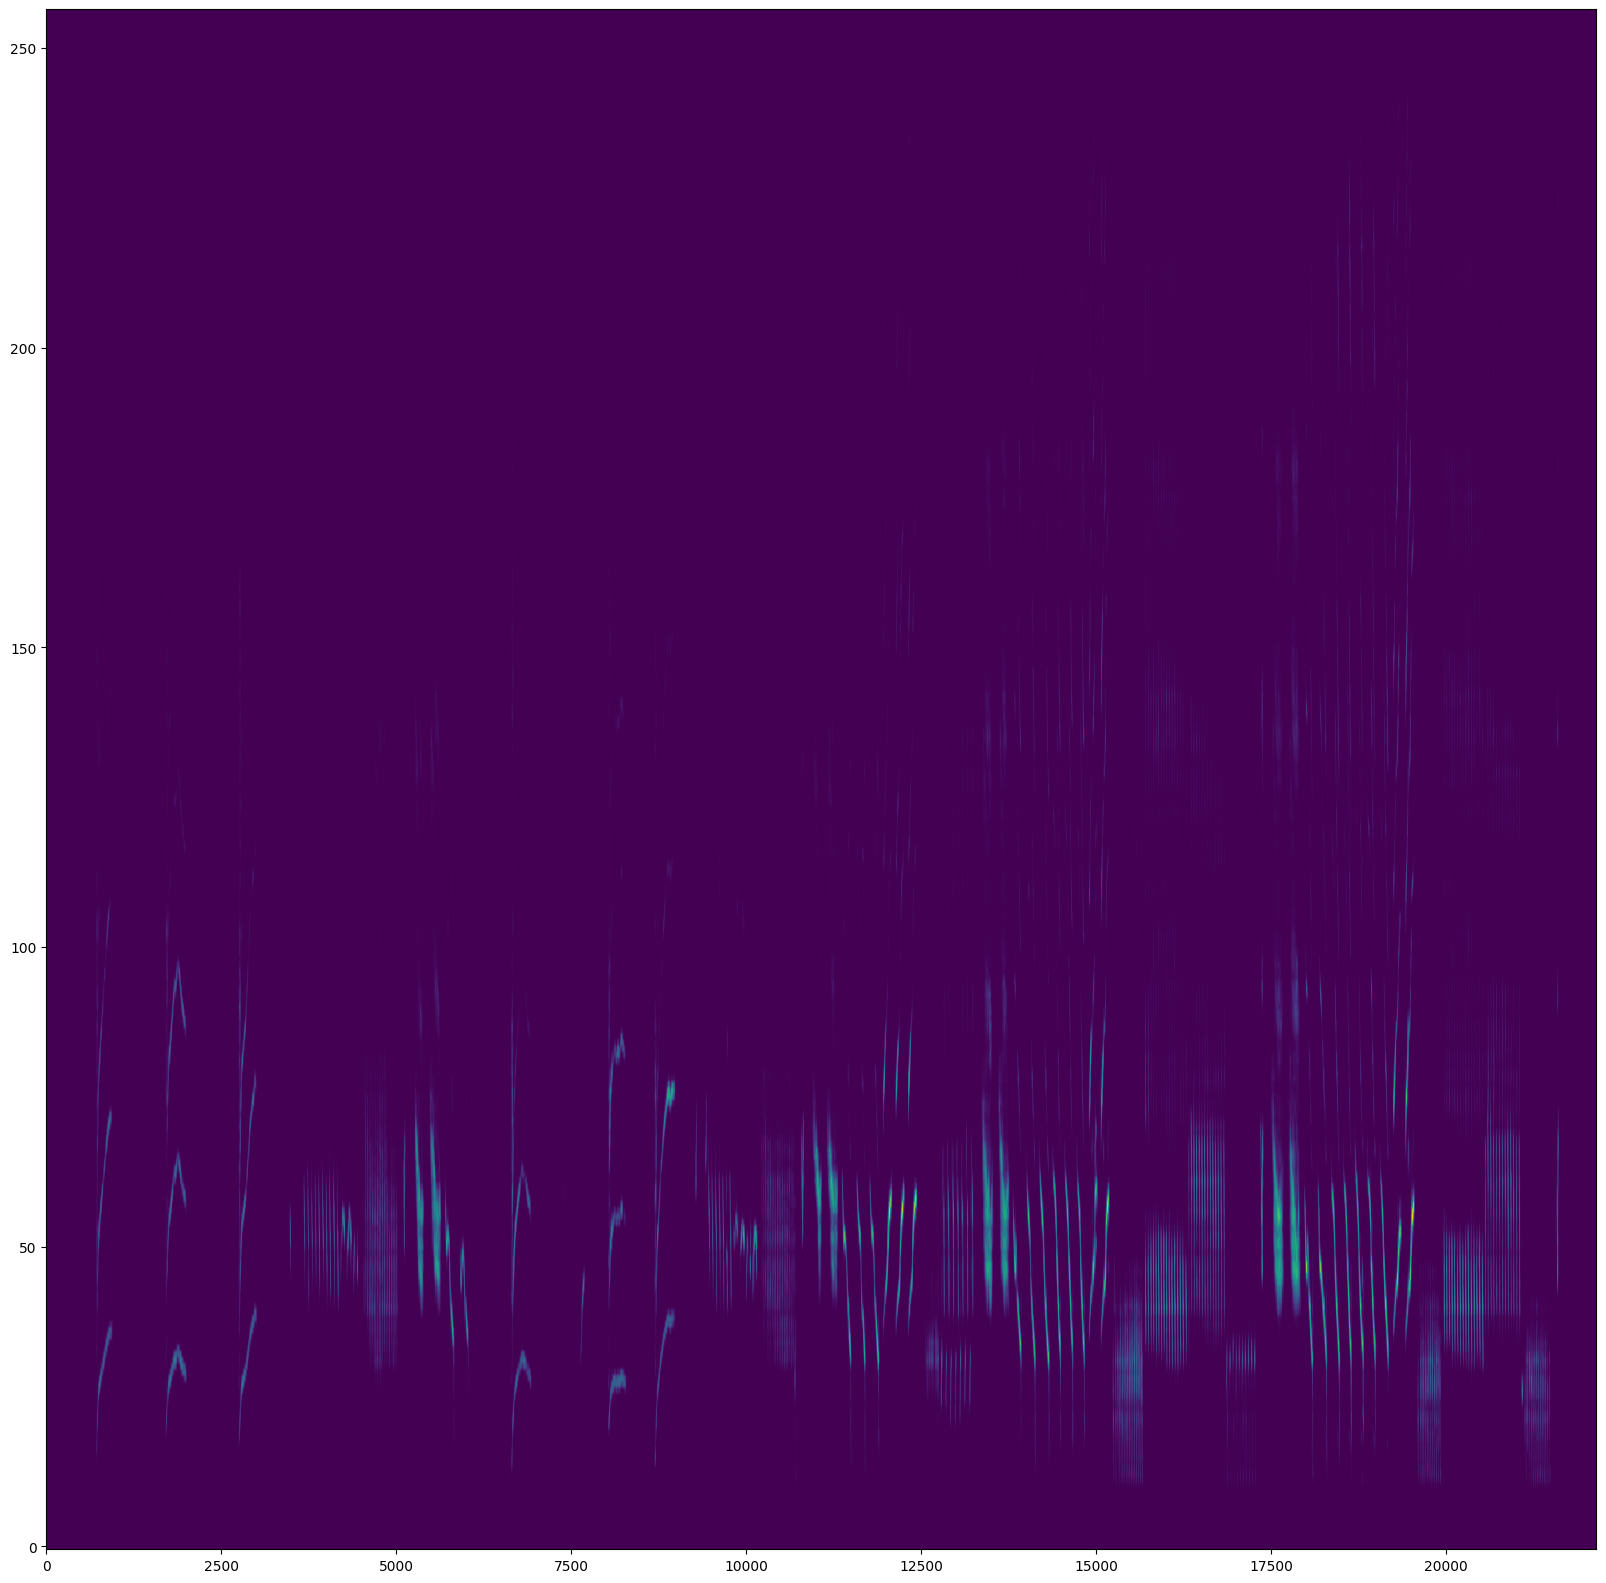

In [5]:
plt.figure(figsize = (20,20))
plt.imshow(np.log(5+spectrum), aspect = 'auto',origin = 'lower')

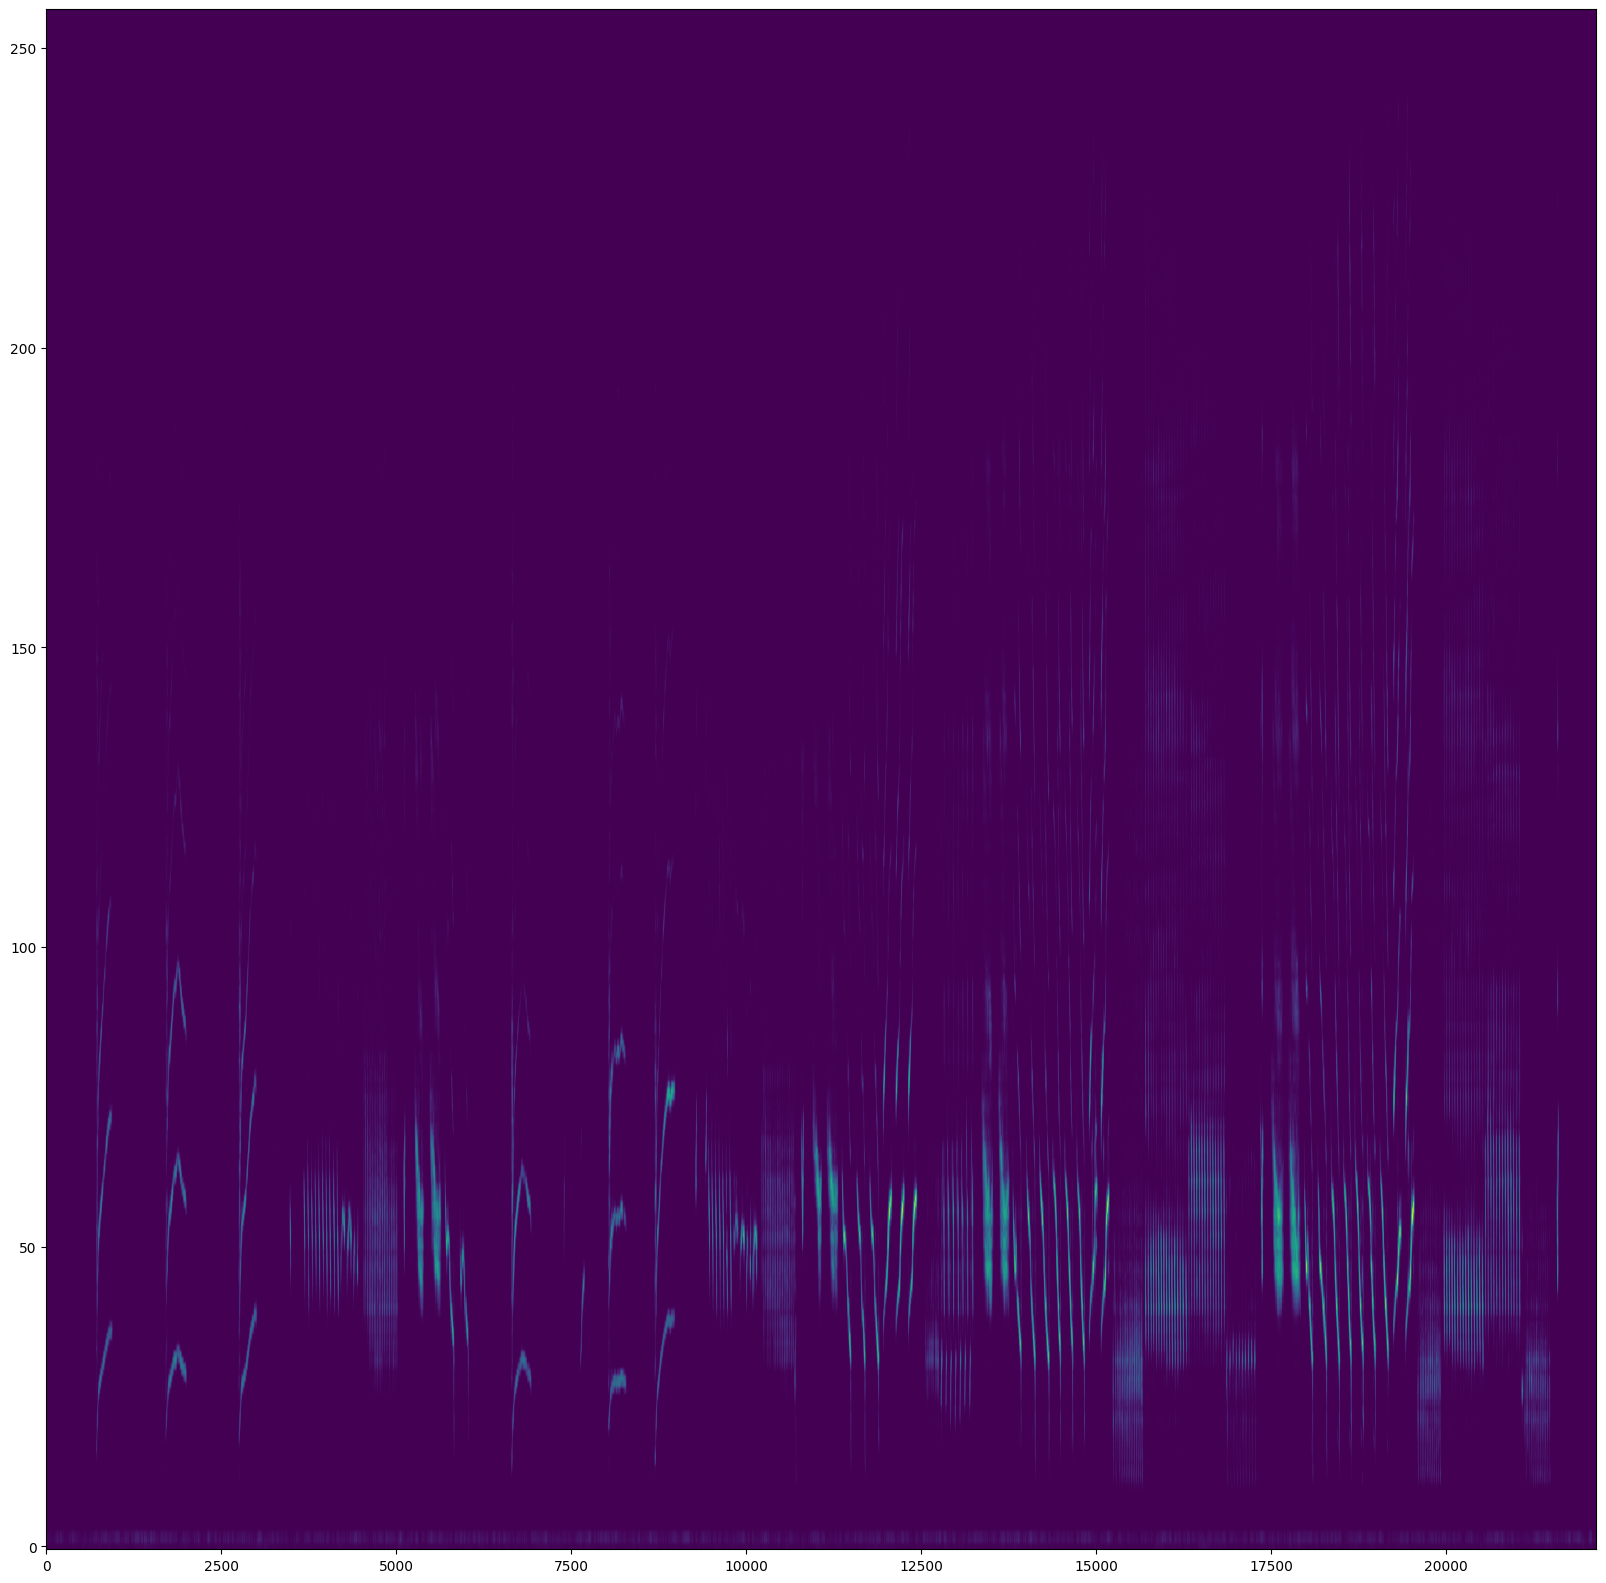

In [6]:
plt.figure(figsize = (20,20))
plt.imshow(np.log(5+spectrumA), aspect = 'auto',origin = 'lower')

In [7]:
print(spectrum)
print(np.max(spectrum))
print(np.min(spectrum))

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.49706069e-09
  6.15296525e-08 1.12301747e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.04769716e-08
  1.23059305e-07 2.20659376e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.49439847e-08
  1.23059305e-07 2.23672061e-07]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.27812274e-08
  1.23059305e-07 2.23672061e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.06180725e-08
  1.23059305e-07 2.20659376e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.24896101e-08
  6.15296525e-08 1.12301747e-07]]
159127.2954667338
0.0


In [8]:
usableFolder = '/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/'

filePaths = [usableFolder + fileName for fileName in os.listdir(usableFolder)]
newFilePaths= ['/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22309894_6_30_6_11_49.npz','/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22417045_6_30_6_13_37.npz',
'/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22526651_6_30_6_15_26.npz']
masterFeats = None
for filePath in newFilePaths:
  dataset = np.load(filePath)
  feats, names, t = dataset['feats'],dataset['names'],dataset['t']
  print(filePath)
  print(t[1] - t[0])


  try:
    masterFeats = np.hstack((masterFeats,feats))
  except:
    masterFeats = feats


/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22309894_6_30_6_11_49.npz
0.0010009674436831438
/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22417045_6_30_6_13_37.npz
0.0010092890317970704
/content/drive/MyDrive/Rose_Bird/Demo_Features_NPZ/USA5207_45107.22526651_6_30_6_15_26.npz
0.0010014416617642797


In [9]:

# Obtain Slices
def get_matrix_slices(matrix, window_size, step_size):
    matrix_shape = matrix.shape
    num_slices = (matrix_shape[1] - window_size) // step_size + 1
    slices = np.zeros((matrix_shape[0], window_size, num_slices))
    start_times = np.zeros((num_slices))

    for i in range(num_slices):
        start = i * step_size
        end = start + window_size
        slices[:, :, i] = matrix[:, start:end]
        start_times[i] = start

    return slices,start_times

# UMAP slicing param in pixels/bins
# Perfect time stuff

print(t[1] - t[0])
window_size = 100
step_size = 5

slices, start_times = get_matrix_slices(masterFeats,window_size, step_size)

# feats = scipy.stats.zscore(feats)


# colorTime = fakeT[start_times.astype(int)]
# Turn each slice into a 1D vector
original_shape = slices.shape
flattened_matrix = slices.reshape(original_shape[0] * original_shape[1], original_shape[2]).T

# Load the umap library, and transform the data
import umap
fit = umap.UMAP()
spec_emb = fit.fit_transform(flattened_matrix)

0.0010014416617642797


In [10]:
print(slices.shape)

(68, 100, 13361)


In [11]:
# define the network
import tensorflow as tf
dims = (68, 100,1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 34, 50, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 25, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 27200)             0         
                                                                 
 dense (Dense)               (None, 256)               6963456   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 7048578 (26.89 MB)
Trainable params: 70485

In [12]:
from umap.parametric_umap import ParametricUMAP


with tf.device('/device:GPU:0'):

  embedder = ParametricUMAP(n_training_epochs = 1,encoder=encoder,dims = dims)
  embeddingParam = embedder.fit_transform(flattened_matrix)

Epoch 1/10
1772/1772 [==============================] - 77s 35ms/step - loss: 0.1914
Epoch 2/10
1772/1772 [==============================] - 61s 35ms/step - loss: 0.1813
Epoch 3/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1788
Epoch 4/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1775
Epoch 5/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1767
Epoch 6/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1760
Epoch 7/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1750
Epoch 8/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1746
Epoch 9/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1744
Epoch 10/10
1772/1772 [==============================] - 62s 35ms/step - loss: 0.1740


In [13]:
import tensorflow as tf
len(tf.config.list_physical_devices('GPU'))

1

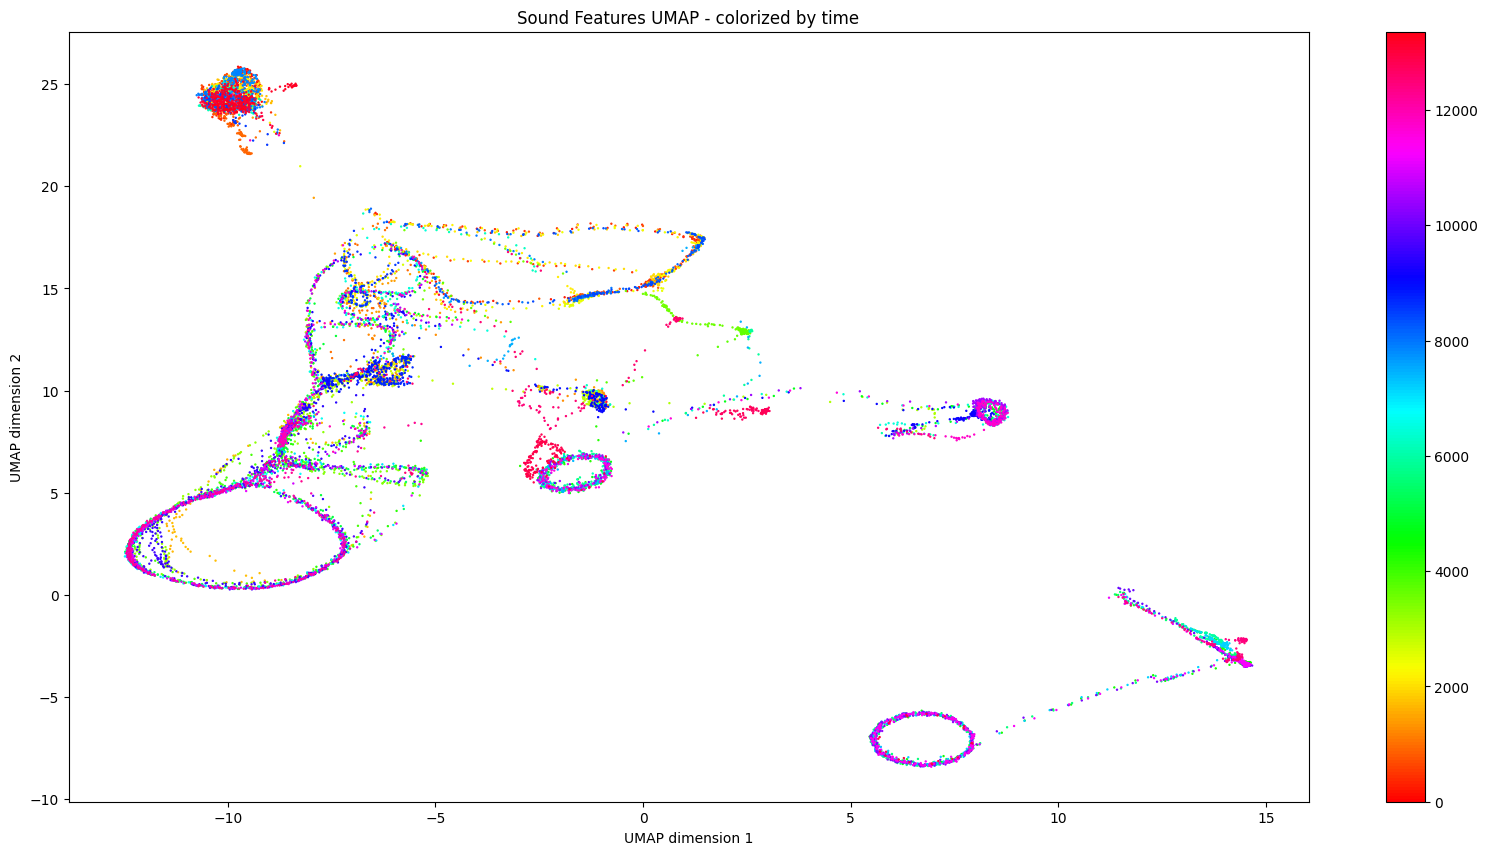

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(embeddingParam[:,0],embeddingParam[:,1],s = .5,cmap='hsv',c = np.arange(embeddingParam.shape[0]))
plt.title('Sound Features UMAP - colorized by time')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar()
plt.show()

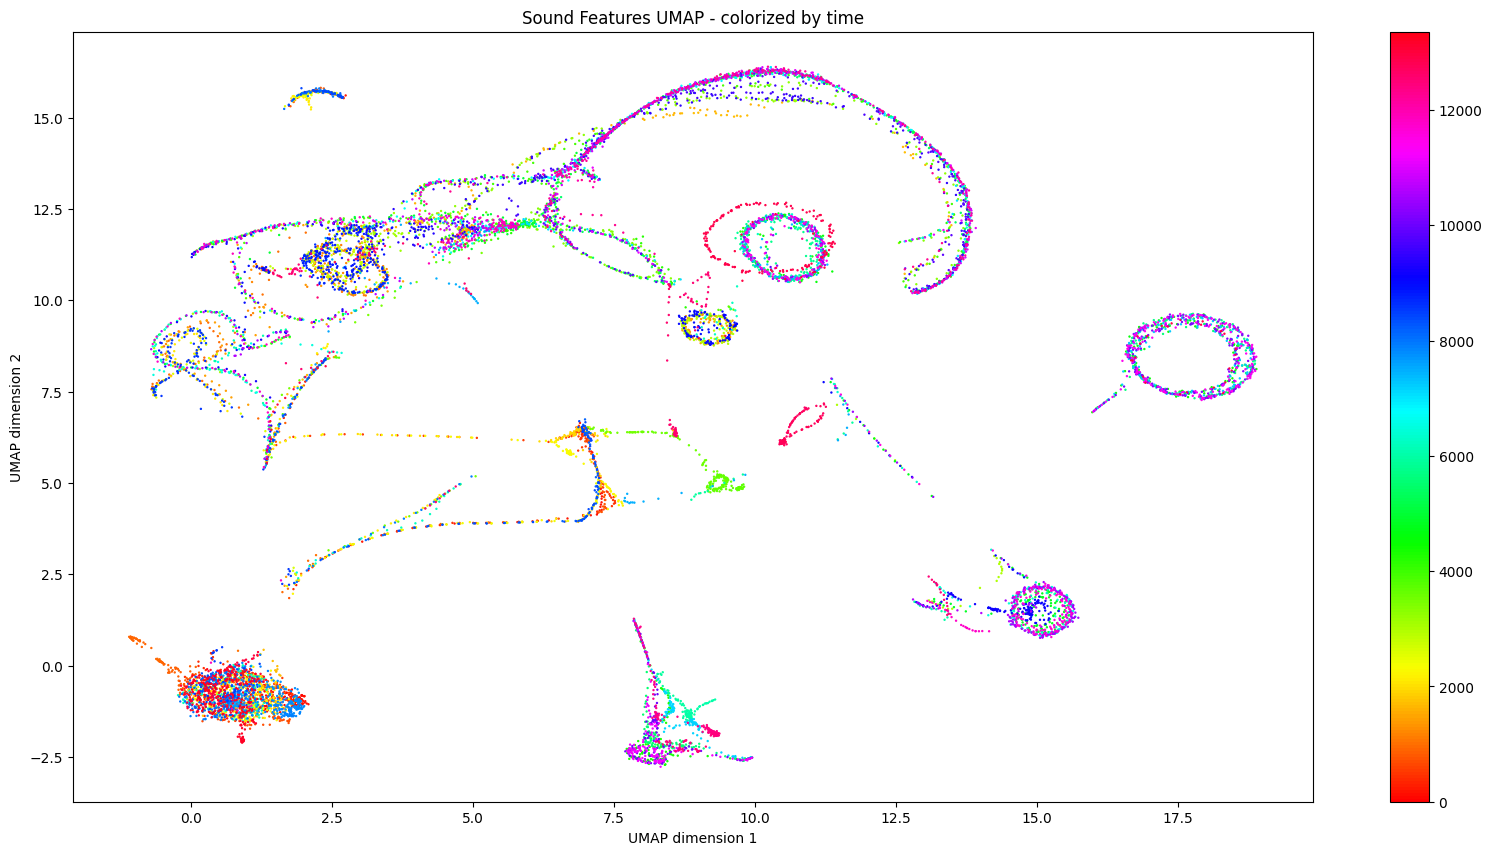

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(spec_emb[:,0],spec_emb[:,1],s = .5,cmap='hsv',c = np.arange(spec_emb.shape[0]))
plt.title('Sound Features UMAP - colorized by time')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar()
plt.show()